In [56]:

import pandas as pd
from prophet import Prophet
import requests
import pandas as pd
def get_fred_series_observations(series_id, api_key):
    # Endpoint for series observations
    base_url = "https://api.stlouisfed.org/fred/series/observations"
    params = {
        "series_id": series_id,
        "api_key": api_key,
        "file_type": "json"
    }
    response = requests.get(base_url, params=params)
    return response.json()

api_key = 'gyef8c3af7f7bebd62ffff5b460d66375axc'
series_id = 'CPIAUCSL'

# Fetch the data points for the series
data = get_fred_series_observations(series_id, api_key)

# Check if observations are in the response and create a DataFrame
if 'observations' in data:
    df = pd.DataFrame(data['observations'])
    df = df[['date', 'value']]  # Select only the 'date' and 'value' columns
    df.rename(columns={'date': 'ds'}, inplace=True)


    df['value'] = pd.to_numeric(df['value'], errors='coerce')  # Convert values to numeric, handling non-numeric entries
    df['ds'] = pd.to_datetime(df['ds'])  # Convert date strings to datetime objects

    # Calculate percent change from a year ago
    #df.set_index('ds', inplace=True)  # Set date column as index for easier manipulation
    df['y'] = (df['value'].pct_change(periods=12) * 100).round(2)  # Calculate percent change

else:
    print("Observations not found in the response.")
    df = pd.DataFrame()


m = Prophet()
m.fit(df)
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=90)
fcst = m.predict(future)
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqyvo7n43/e8xxd9fd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqyvo7n43/4v06r8is.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99312', 'data', 'file=/tmp/tmpqyvo7n43/e8xxd9fd.json', 'init=/tmp/tmpqyvo7n43/4v06r8is.json', 'output', 'file=/tmp/tmpqyvo7n43/prophet_modelmdg1ws4u/prophet_model-20240105133616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

,ds,yhat,yhat_lower,yhat_upper
996,2024-01-26,0.948890,-1.839679,3.637795
997,2024-01-27,1.172813,-1.590335,3.912926
998,2024-01-28,1.432625,-1.850228,4.205700
999,2024-01-29,1.724645,-0.952826,4.895277
1000,2024-01-30,2.044455,-0.621589,5.070061


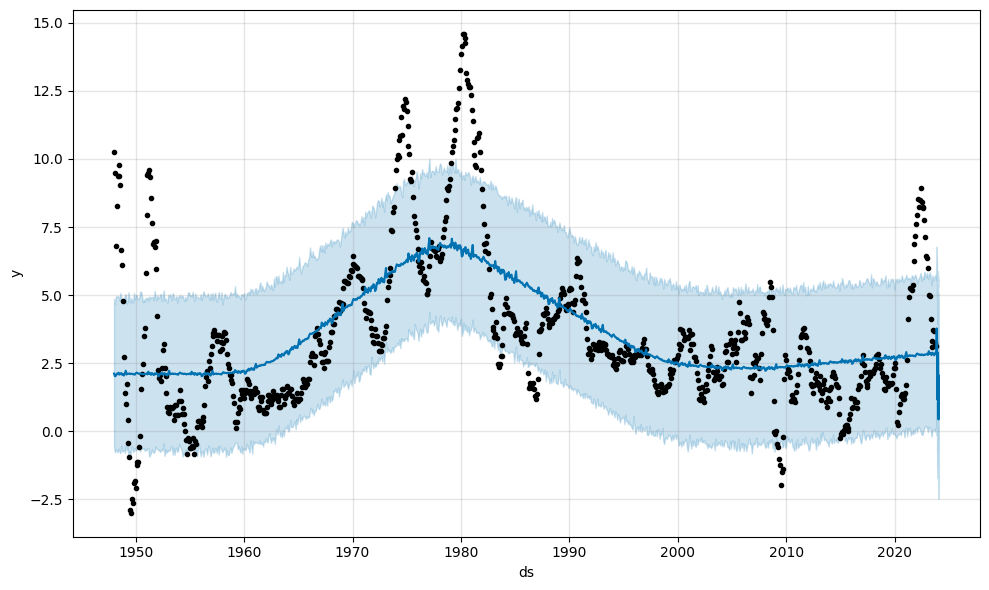

In [57]:
fig1 = m.plot(fcst)

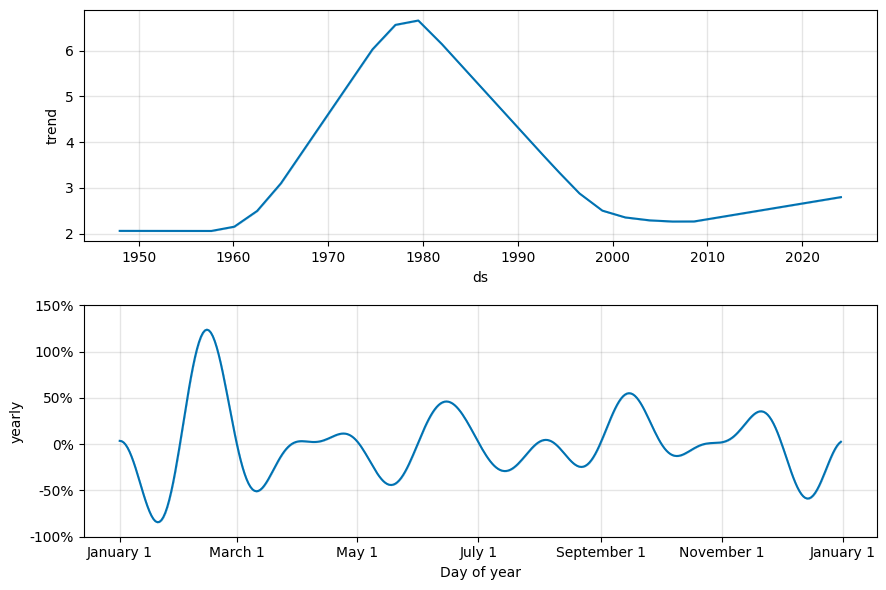

In [58]:
fig2 = m.plot_components(fcst)



In [59]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, fcst)

In [51]:
plot_components_plotly(m, fcst)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqyvo7n43/06k2clyg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqyvo7n43/7qfu9s9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77264', 'data', 'file=/tmp/tmpqyvo7n43/06k2clyg.json', 'init=/tmp/tmpqyvo7n43/7qfu9s9d.json', 'output', 'file=/tmp/tmpqyvo7n43/prophet_modelpn9fubub/prophet_model-20240105133023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:30:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


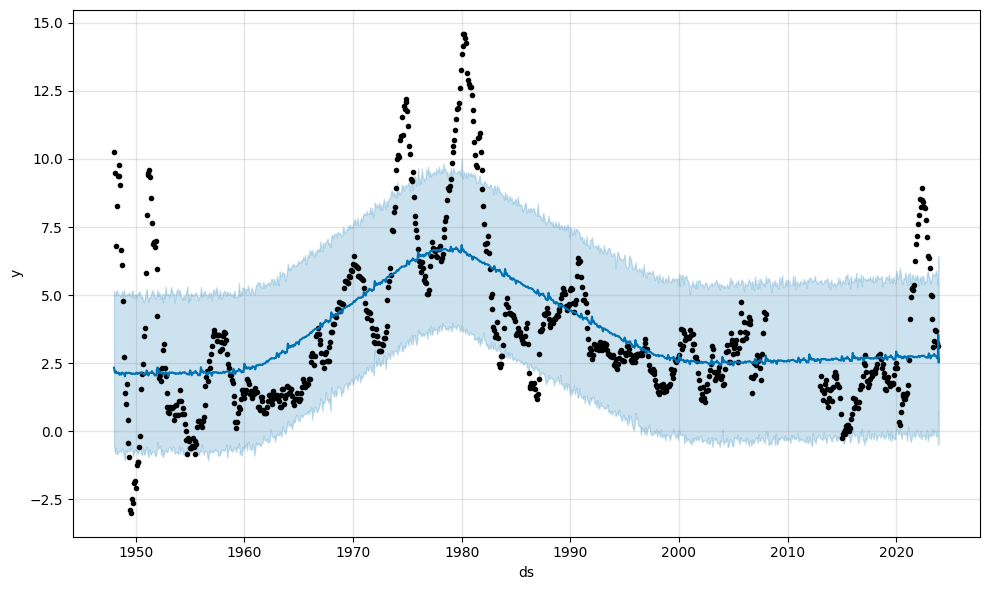

In [53]:
df.loc[(df['ds'] > '2008-01-01') & (df['ds'] < '2013-01-01'), 'y'] = None
model = Prophet().fit(df)
fig = model.plot(model.predict(future))